## Welcome to E-tivity 3

Your Name: Zheng Hanming

Your Student ID Number: 21225621

### Objective:
*Compute the value of a barrier option using Monte Carlo Simulations, and derive the expected P&L from observed rates underlying an 'asset swap'.*

### Background Information
This weeks' set of videos focused primarily on the background underlying the Black-Scholes-Merton Pricing model, and how
it can be applied to other derivative types. We dove a little further than that though - we detailed in **Lecture 9** how
the randomness underlying the *stock price process itself* can be replicated, and leveraged this randomness to derive the
price of a European path-dependent stock option.

We also saw how a number of interest rate derivatives are formed, and how interest rate derivatives can be matched
together to form a **derivative on a derivative**.

In E-tivity 3, your task is to implement these approaches in Python: to **value a Barrier Option using Monte Carlo Simulations**,
and to **assess the performance of an Asset Swap based on Floating Rate Notes**.

## 1. Library Requirements

In [27]:
#!pip install -U setuptools
#!pip install numpy pandas matplotlib

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

No external data is required for now, so we can skip straight on to:

## 2. E-tivity Actions

#### Objective
*Calculate the price of a Barrier Option using Monte Carlo Simulations, and assess the performance of an asset swap over a
1-year period.*

### Task Breakdowns:
####    Task 1: Monte Carlo Simulation Pricing
1. Create an array full of random, normally-distributed numbers with mean 0, standard deviation 1. Thereafter, simulate
10,000 stock price paths over a 26 trading day period using the Ito Process ($dS_t = \mu S_t dt + \sigma S_t dW_t$) to
replicate the 'random, upward drifting' evolution of stock prices.
3. Implement barrier conditions to calculate the payoffs for each of the 10,000 simulations at each of the time steps,
and find the average value at each time step. Discount the average value of the payoffs at the final time step to derive
the risk-neutral Barrier Option price.

#### Sub-task 1

Before being able to compute the barrier option price, we must generate a large number of simulations that replicate how the
asset price may perform over a pre-set time period. We perform this operation by applying the Ito Process ($dS_t = \mu S_t dt + \sigma S_t dW_t$)
for `time_to_maturity` years, where $dt$ describes the difference in time between successive 'random' prediction timesteps.

#### Objective
Implement the Ito Process to replicate Stock Price behaviour as part of a Monte Carlo Simulation pricing methodology.

#### Further details
You may use the Amazon Option pricing example given in Lecture 9 as a baseline to guide your implementation. You may also
 find Lecture 9, Slide 9 helpful in your implementation.

*Hint:*
- *`np.random.normal(size = (x, y))` can be used to generate an array of random, normally-distributed numbers with mean 0 and std. dev. 1.*
- *remember that the random changes as defined by the Wiener Process are scaled to the size of the square root of the time step*

In [29]:
"""
Passes in the parameters required to replicate the Ito Process (starting value, expected drift, volatility, and expected
time increments between successive values) as well as two other parameters: the time period being modelled (in years)
and the number of simulations. The function returns an array replete with the entire spread of simulated stock prices,
as well as the 'drift' term and the starting value, which can be passed to the next function.

Parameters
---------
starting_price : float
    Starting price of the asset
mu : float
    Expected drift rate of the process per year. Used as a stand-in for the risk-free interest rate r.
volatility : float
    Annualised implied volatility of the underlying asset price movements
number_of_simulations : int
    number of random asset price paths being simulated.
time_to_maturity : float
    length of the time period being modelled, expressed in years.
delta_t : float
    length of time between assumed asset price movements, expressed in years.

Returns
-------
prices : array
    array containing all stock price path simulations.
mu : float
    Expected drift rate of the process per year.
starting_price : float
    Starting price of the asset
"""

def StockPriceSimulations(starting_price, mu, volatility, number_of_simulations, time_to_maturity, delta_t):

    Timesteps = int(time_to_maturity/delta_t)
    prices = np.zeros((Timesteps, number_of_simulations))

    ##** YOUR CODE STARTS HERE**
    W = np.random.normal(size=prices.shape) * np.sqrt(delta_t)
    prices[0, :] = starting_price

    for simulation in range(number_of_simulations):
        # each column is a simulation containing prices for all time steps
        for timestep in range(1, Timesteps):
            # each row is the prices at each time step for all simulations
            # range for timesteps starts from 1 before index 0 is the starting price
            # St is used instead of S0 to reflect the exponential increase over time
            St = prices[timestep-1, simulation]
            # include randomness in the simulation by getting the random number from W
            dWt = W[timestep, simulation]
            # set price at current time step: Itô process
            # mu: expected percentage annual increase in stock price
            # delta_t: change in time for each time step
            prices[timestep, simulation] = St + (mu * St * delta_t) + (volatility * St * dWt)
    ##** YOUR CODE ENDS HERE**

    return prices, mu, starting_price

In [30]:
##** YOUR CODE STARTS HERE**
price_t0 = 97
strike = 98
vol = 0.4015
µ = 0.0481
delta_t = 1/252
time_to_maturity = 26/252
simulation_num = 10_000

price_simulations, mu, starting_price = StockPriceSimulations(price_t0, µ, vol, simulation_num, time_to_maturity, delta_t)

print('Preview Simulated Prices for 1st 3 Simulation')
print(np.round(pd.DataFrame(price_simulations[:,:3]), decimals=2))
print(f"\nAvg Price of All Simulations at Last Timestep: {round(np.average(price_simulations[-1]), 2)}")
##** YOUR CODE ENDS HERE**

Preview Simulated Prices for 1st 3 Simulation
        0       1       2
0   97.00   97.00   97.00
1   92.08   96.85   99.33
2   89.38   98.56   98.48
3   89.84   92.98   97.70
4   89.44   96.31  102.25
5   91.43   99.04  104.52
6   93.36   96.03  102.18
7   94.47   95.95  103.18
8   88.25  100.92  104.40
9   88.81  102.35  106.28
10  86.92  101.18  106.60
11  86.52  101.14  103.41
12  85.59  101.51  100.34
13  87.04  104.97   97.03
14  92.17  102.78   95.90
15  94.27  104.35   96.57
16  91.63  102.21   99.14
17  97.37   98.92   96.45
18  95.82   98.30   98.92
19  97.84   97.34   99.71
20  97.96   99.22   99.93
21  94.91   95.10   97.17
22  95.73   94.55   96.42
23  96.49   93.11  100.17
24  96.03   90.01  103.24
25  96.49   91.61  101.29

Avg Price of All Simulations at Last Timestep: 97.44


#### Sub-task 2

Now that you have enough stock price simulations to reasonably represent the range of possible paths the real-world stock
price can take over the next `time_to_maturity` years, you can derive the value of any European path-dependent option.

In this
task, we will be focusing on European Barrier Options. To carry out the valuation of these options, you must implement a
function that computes both the normal payoff computation (i.e. by comparing the prevailing asset price vs. the strike)
and the barrier-dependent payoff computation. Once you have a view on the average payoff at the final time step, you can
discount the average payoff back to time 0 to derive the value of the European Barrier Option.

#### Objective
Use the stock price simulations computed in subtask 1 to derive the value of a European Barrier Option, by comparing the
stock prices against i) the strike, and ii) the barrier conditions.

#### Further details
There are four possible variants of a Barrier Option. These have been provided in Slides 12 and 13 of Lecture 9. You may
 also find Lecture 9, Slide 14 helpful in your implementation.

*Hint:*
- *Your E-tivity 2 implementation may help you when figuring out how to compute European-style payoffs, before implementing
 the barrier-dependent payoff calculations.*
- *`max` and `min` can be used to determine whether barrier conditions have been met or avoided.*

In [31]:
import math
# helper function to print the workings of getting option price
def print_workings(limit_prices, prices_up_to_t, barrier_option_payoffs, timestep, type='Max'):
    workings = []
    for sim in range(3):
        payoff = barrier_option_payoffs[timestep, sim]
        payoff_str = format_number(payoff)

        current_price = prices_up_to_t[timestep, sim]
        current_price_str = format_number(current_price)

        limit_price = limit_prices[sim]
        limit_price_str = format_number(limit_price)
        workings.append(f'Current({type}:{limit_price_str}):{current_price_str}-Payoff:{payoff_str}')
    print(f'Timestep: {timestep:2} | {workings}')

def format_number(number):
    (payoff_dec, payoff_int) = math.modf(number)
    return f'{str(int(payoff_int)).rjust(3)}{str(round(payoff_dec, 2))[1:].ljust(3,"0")}'

In [32]:
"""
Passes in the details of the European Barrier Option, and computes a series of payoff calculations (both vanilla and barrier-dependent)
to derive the average payoff at each time step. The average payoff value at the final time step can be taken to represent
the 'implied risk-neutral expected payoff' of the option, which is then discounted back to time 0 to find the option price.

Parameters
---------
barrier_direction : string
    string input to determine whether the barrier is to be placed above ("up") or below ("down") the initial asset starting price.
barrier_type : string
    string input to determine whether the barrier needs to be struck ("in") or whether the barrier needs to be avoided ("out").
option_type : string
    string input to determine whether the payoff structure on the option ("call" or "put").
starting_price : float
    Initial price of the asset
strike : float
    strike price of the option
barrier_level : float
    Distance of the barrier from the initial starting price, as proportion of the initial starting price. A positive float
    stated in decimal form (e.g. a barrier that is 15% above or below the initial starting price will require an input
    of '.15').
set_of_prices : array
    set of stock price simulations found in Task 1.
mu : float
    Expected drift rate of the process per year. Used as a stand-in for the risk-free interest rate r.

Returns
-------
option_price : float
    European Barrier Option price, valued on the basis of the average European payoff from qualifying stock price
    simulations at the final time step.
"""
def European_Barrier_Option_Price(barrier_direction, barrier_type, option_type, starting_price, strike, barrier_level, set_of_prices, mu):

    option_type = option_type.lower()
    barrier_direction = barrier_direction.lower()
    barrier_type = barrier_type.lower()

    if option_type == "call":
        ##**YOUR CODE STARTS HERE**
        # get barrier option payoffs: stock prices - strike
        barrier_option_payoffs = np.subtract(set_of_prices, strike)
        # set negative payoff to 0 because no exercise will happen when payoff is negative
        barrier_option_payoffs[barrier_option_payoffs < 0] = 0
        ##**YOUR CODE ENDS HERE**
    elif option_type == "put":
        ##**YOUR CODE STARTS HERE**
        # get barrier option payoffs: strike - stock prices
        barrier_option_payoffs = np.subtract(strike, set_of_prices)
        # set negative payoff to 0 because no exercise will happen when payoff is negative
        barrier_option_payoffs[barrier_option_payoffs < 0] = 0
        ##**YOUR CODE ENDS HERE**
    else:
        print("Please enter either 'call' or 'put'.")
        return

    if barrier_direction == "up":
        ##**YOUR CODE STARTS HERE**
        barrier = starting_price + barrier_level
        print(f'Barrier: {barrier}')
        ##**YOUR CODE ENDS HERE**
    elif barrier_direction == "down":
        ##**YOUR CODE STARTS HERE**
        barrier = starting_price - barrier_level
        print(f'Barrier: {barrier}')
        ##**YOUR CODE ENDS HERE**
    else:
        print("Please specify whether the direction of your barrier is 'up' or 'down'.")
        return

    if barrier_type == "in":
        ##**YOUR CODE STARTS HERE**
        # before breaching the barrier, set payoffs to 0
        # after breaching the barrier, keep payoffs
        if barrier_direction == "up":
            # barrier direction Up-and-In
            for timestep in range(set_of_prices.shape[0]):
                # breached is an array containing if all historical prices for each simulation is breached
                # 1: get all historical prices up until *timestep* for all simulations
                prices_up_to_t = set_of_prices[0:timestep+1]
                # 2: get max historical price up to current timestep for all simulations(represented as array)
                max_prices = np.max(prices_up_to_t, axis=0)
                # 3: determine if barrier is breached by checking if the max historical price goes above the barrier
                breached = max_prices > barrier
                # 4: set option payoff to 0 if barrier has not been breached
                barrier_option_payoffs[timestep, np.invert(breached)] = 0
                # print working
                print_workings(max_prices, prices_up_to_t, barrier_option_payoffs, timestep)
        else:
            # barrier direction Down-and-In
            for timestep in range(set_of_prices.shape[0]):
                # breached is an array containing if all historical prices for each simulation is breached
                # 1: get all historical prices up until *timestep* for all simulations
                prices_up_to_t = set_of_prices[0:timestep+1]
                # 2: get min historical price up to current timestep for all simulations(represented as array)
                min_prices = np.min(prices_up_to_t, axis=0)
                # 3: determine if barrier is breached by checking if the min historical price goes below the barrier
                breached = min_prices < barrier
                # 4: set option payoff to 0 if barrier has not been breached
                barrier_option_payoffs[timestep, np.invert(breached)] = 0
                # print working
                print_workings(min_prices, prices_up_to_t, barrier_option_payoffs, timestep)
        ##**YOUR CODE ENDS HERE**
    elif barrier_type == "out":
        ##**YOUR CODE STARTS HERE**
        # before breaching the barrier, keep payoffs
        # after breaching the barrier, all payoffs to 0
        if barrier_direction == "up":
            # barrier direction Up-and-Out
            for timestep in range(set_of_prices.shape[0]):
                # breached is an array containing if all historical prices for each simulation is breached
                # 1: get all historical prices up until *timestep* for all simulations
                prices_up_to_t = set_of_prices[0:timestep+1]
                # 2: get max historical price up to current timestep for all simulations(represented as array)
                max_prices = np.max(prices_up_to_t, axis=0)
                # 3: determine if barrier is breached by checking if the max historical price goes above the barrier
                breached = max_prices > barrier
                # 4: set option payoff to 0 if barrier has been breached
                barrier_option_payoffs[timestep, breached] = 0
                # print working
                print_workings(max_prices, prices_up_to_t, barrier_option_payoffs, timestep)
        else:
            # barrier direction Down-and-Out
            for timestep in range(set_of_prices.shape[0]):
                # breached is an array containing if all historical prices for each simulation is breached
                # 1: get all historical prices up until *timestep* for all simulations
                prices_up_to_t = set_of_prices[0:timestep+1]
                # 2: get min historical price up to current timestep for all simulations(represented as array)
                min_prices = np.min(prices_up_to_t, axis=0)
                # 3: determine if barrier is breached by checking if the min historical price goes below the barrier
                breached = min_prices < barrier
                # 4: set option payoff to 0 if barrier has been breached
                barrier_option_payoffs[timestep, breached] = 0
                # print working
                print_workings(min_prices, prices_up_to_t, barrier_option_payoffs, timestep)
        ##**YOUR CODE ENDS HERE**
    else:
        print("Please specify whether the option needs to be knocked 'in', or can be knocked 'out'. Reverting to European Option value:")

    barrier_option_mean_payoff = np.zeros((1, set_of_prices.shape[0]))
    ##**YOUR CODE STARTS HERE**
    barrier_option_mean_payoff[0,:] = np.average(barrier_option_payoffs, axis=1)
    ##**YOUR CODE ENDS HERE**
    option_price = np.multiply(barrier_option_mean_payoff, np.exp(np.multiply(-mu,set_of_prices.shape[0]/252)))[0,-1]

    return option_price

In [33]:
##**YOUR CODE STARTS HERE**
barrier_direction = "up" # up | down
barrier_type = "in" # in | out
option_type = "call" # call | put
barrier_level = 3
print('-------------------------------------------- Barrier Option Payoff: First 3 Simulations --------------------------------------------')
print(f'Strike Price: {strike}')
Option_Price = European_Barrier_Option_Price(barrier_direction, barrier_type, option_type, starting_price, 
                                             strike, barrier_level, price_simulations, mu)
print("\nDiscounted Option Price:", Option_Price)
##**YOUR CODE ENDS HERE**

-------------------------------------------- Barrier Option Payoff: First 3 Simulations --------------------------------------------
Strike Price: 98
Barrier: 100
Timestep:  0 | ['Current(Max: 97.00): 97.00-Payoff:  0.00', 'Current(Max: 97.00): 97.00-Payoff:  0.00', 'Current(Max: 97.00): 97.00-Payoff:  0.00']
Timestep:  1 | ['Current(Max: 97.00): 92.08-Payoff:  0.00', 'Current(Max: 97.00): 96.85-Payoff:  0.00', 'Current(Max: 99.33): 99.33-Payoff:  0.00']
Timestep:  2 | ['Current(Max: 97.00): 89.38-Payoff:  0.00', 'Current(Max: 98.56): 98.56-Payoff:  0.00', 'Current(Max: 99.33): 98.48-Payoff:  0.00']
Timestep:  3 | ['Current(Max: 97.00): 89.84-Payoff:  0.00', 'Current(Max: 98.56): 92.98-Payoff:  0.00', 'Current(Max: 99.33): 97.70-Payoff:  0.00']
Timestep:  4 | ['Current(Max: 97.00): 89.44-Payoff:  0.00', 'Current(Max: 98.56): 96.31-Payoff:  0.00', 'Current(Max:102.25):102.25-Payoff:  4.25']
Timestep:  5 | ['Current(Max: 97.00): 91.43-Payoff:  0.00', 'Current(Max: 99.04): 99.04-Payoff:  

Congratulations! You have now created Monte Carlo Simulations of stock prices, and used them to value a Barrier Option,
one of many path-dependent European Options.

You may have found that each time the simulations are run, a different option price is produced. You may also have found
that the more 'simulations' you include in each simulation run in task 1, the more precise your option prices were -
typically, 10,000-20,000 is enough to produce a relatively stable result *(of course, it should be noted that these tools
are for indicative use only - a client may not be happy if they are quoted different prices each time the model is run!)*

Monte Carlo Simulations are not only used in Derivative Pricing, however, they are used in any financial setting where
randomness is expected over time. As such, you may find Monte Carlo Simulations being used heavily in **Corporate
Finance** to assess the expected performance of prospective projects that require financing, and **Portfolio Optimisation**
settings to determine optimal portfolio allocations.

## Task 2

Assessing the performance of an Interest Rate Derivative is our next task - specifically, a derivative on a derivative.
Given two Floating Rate Notes, the payment dates, and the daycount convention associated with each, we will be able to
create a P&L calculator for an ongoing 'asset swap'.

Before we start, however, let us have a look at the rates we are dealing with:

## Reading in the Rates:

In [34]:
ThreeMonth_rates = pd.read_csv('Data/FRNs_2022.csv', index_col=[0])
ThreeMonth_rates.head()

3m_Average_SOFR  3m_Tbill_Rate
DATE                                      
31/12/2021          0.00000           0.00
02/01/2022          0.54945           0.19
03/01/2022          0.54934           0.32
04/01/2022          0.58856           0.53
05/02/2022          0.67059           0.90

#### Rates Included
*Note the first rate observations are zeroed out - you can consider this day 0 in the asset swap, so no payments are swapped.
This row is only included as we need information on the 'starting date' in subtask 1.*
- **3m_Average_SOFR**: Floating Rate Note rates based on the Compounded Average overnight SOFR over the last 3 months, plus a 50 basis point (0.5%) 'spread'. This is a 'money market' FRN rate.
- **3m_Tbill_Rate**: Floating Rate Note rates based on the latest 3-month Treasury Bill rate. Note that the Treasury Rates are determined by the highest accepted 3-month treasury bill 'bid rate'
at Treasury auctions each month. This is a 'government-linked' FRN rate.

## Data Exploration:

Let's have a look at a summary of the data we have: number of observations, average rate(s), and distributions of rates.

In [35]:
ThreeMonth_rates.describe().transpose().style.format("{:.2f}")

T-Bill rates are higher on average. Despite having roughly similar low-mid range rates, the Treasury Bill rate had a much higher
75th percentile and maximum than the Average SOFR in 2022. What is also evident is that the rates have been provided to
us in unit form, even though they are percentages that are to be used in calculations in decimal form. You may want to
transform the rates in order to avoid computational slips.

In [36]:
##**YOUR CODE STARTS HERE**
# discount the rates to decimal values
ThreeMonthSOFR = ThreeMonth_rates['3m_Average_SOFR'] * 0.01
print('ThreeMonthSOFR\n', ThreeMonthSOFR)
ThreeMonthTBill = ThreeMonth_rates['3m_Tbill_Rate'] * 0.01
print('ThreeMonthTBill\n', ThreeMonthTBill)
##**YOUR CODE ENDS HERE**

DATE
31/12/2021    0.000000
02/01/2022    0.005495
03/01/2022    0.005493
04/01/2022    0.005886
05/02/2022    0.006706
06/01/2022    0.008995
07/01/2022    0.012121
08/01/2022    0.016746
09/01/2022    0.022030
10/03/2022    0.026808
11/01/2022    0.031187
12/01/2022    0.036098
01/03/2023    0.041772
Name: 3m_Average_SOFR, dtype: float64
DATE
31/12/2021    0.0000
02/01/2022    0.0019
03/01/2022    0.0032
04/01/2022    0.0053
05/02/2022    0.0090
06/01/2022    0.0115
07/01/2022    0.0173
08/01/2022    0.0256
09/01/2022    0.0297
10/03/2022    0.0346
11/01/2022    0.0423
12/01/2022    0.0433
01/03/2023    0.0453
Name: 3m_Tbill_Rate, dtype: float64


Verifying the difference in rates by plotting them all on the same graph.

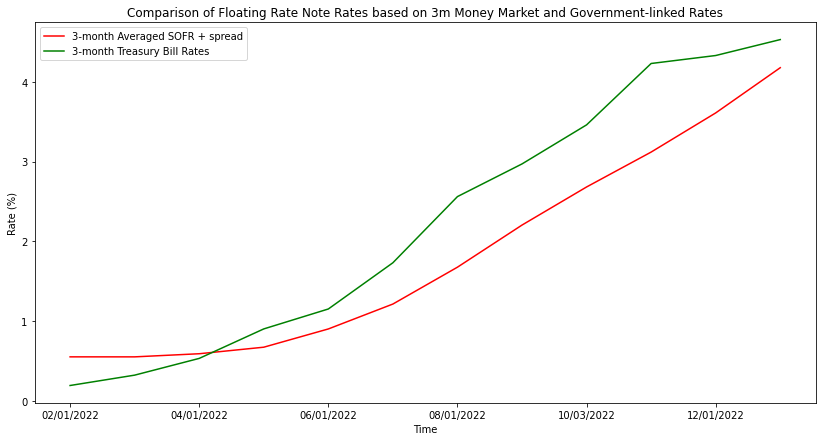

In [37]:
fig, ax = plt.subplots(figsize = (14,7))

ax.plot(ThreeMonth_rates.index[1:], ThreeMonthSOFR[1:]*100, color='red', label='3-month Averaged SOFR + spread')
ax.plot(ThreeMonthTBill[1:]*100, color='green', label='3-month Treasury Bill Rates')
ax.set_xticks(ax.get_xticks()[::2])

ax.set(title="Comparison of Floating Rate Note Rates based on 3m Money Market and Government-linked Rates",
       xlabel='Time',
       ylabel='Rate (%)')
ax.legend()

plt.show()

By plotting the rates, we have found additional nuance within their behaviour that was not fully explained by the summary statistics.
The rates deviate from each quite other often - sometimes the SOFR-linked rate is higher, most of the time the Treasury Bill-linked rate is higher.
In an asset swap with payments swapped every month, this means that each party experienced periods of both profit and loss throughout the year.

Now, with a greater knowledge about the behaviour of the Floating Rate Notes, let's get to calculating the performance of the
Asset Swap, assuming we held the Government-linked Floating Rate Note, but wanted to gain exposure to SOFR and so agreed
to swap this FRN rate with the rate received from a SOFR-linked Floating Rate Note.

The steps to carry this out are as follows:

####    Task 2: Asset Swap Performance Assessment
1. Calculate the number of calendar days between Floating Rate Note payments.
2. Given knowledge of the daycount convention associated with each FRN payment and the rates at each payment date, determine
the interest rate accrued over each payment period.
3. Use the function in Task 2 to compute the Profit and Loss for the party exposed to the SOFR-linked rate as part of
the Asset Swap agreement over a 1-year period, when provided with the appropriate daycount convention for both parties in
the contract, and the Swap contract notional.

#### Sub-task 1

We have seen before that a primary challenge in calculating the amount of interest to be charged is knowing **how long** each
specific interest rate accrues for. In this example, swap payments are made monthly, and the rate underlying the monthly
payment is the rate observed at the end of each month. Therefore, we must know how many calendar days there were between
each payment, in addition to knowing the specific interest rate at the end of the month (i.e. the 'January' swap payment
involves not only knowing the rates at the end of January, but also the number of days in January).

#### Objective
Compute `actual_days_between_dates`: a list containing the number of calendar days between payments / rate-setting dates.

#### Further details
Based on the dates provided in the `ThreeMonth_rates` dataframe, discern the number of calendar days between each payment over
the course of the year, so that it's relative 'prominence' can be determined when calculating the payments to be swapped.

*Hint: This is quite similar to a problem you met in a previous e-tivity.*

In [38]:
"""
Passes in a dataframe of dates corresponding to the payment dates on FRNs, and returns the number of calendar days
between each payment.

Parameters
---------
rate_dates : df
    The dataframe to pass in, that is populated with payment and rate 'reset' days.

Returns
-------
actual_days_between_dates : list
    A list containing the number of calendar days between each successive payment date in the rate_dates dataframe.
"""

def retrieve_actual_days(rate_dates):
    actual_days_between_dates = []

    for i in range(len(rate_dates)-1):

        ## ** YOUR CODE STARTS HERE ** ##
        # end date is the date in the next row
        end_date = pd.to_datetime(rate_dates[i+1], infer_datetime_format=True)
        # start date is the date in this row
        start_date = pd.to_datetime(rate_dates[i], infer_datetime_format=True)
        # calculate the days between each row(payment period) and append to a list
        actual_days_between_dates.append((end_date - start_date).days)
        ## ** YOUR CODE ENDS HERE ** ##

    return actual_days_between_dates

In [39]:
calendar_days_between_dates = retrieve_actual_days(ThreeMonth_rates.index)
print(f'Accrual Days for Each Payment Period: {calendar_days_between_dates}')


Accrual Days for Each Payment Period: [32, 28, 31, 31, 30, 30, 31, 31, 32, 29, 30, 33]


#### Sub-task 2

The reason we need to know the number of calendar days between payments is because Swaps and Floating Rate Notes are
defined by a variety of 'daycount conventions', which determine how interest accrues over time.

Swaps involving USD-linked interest rate derivatives (which we are looking at in this example) are typically calculated
using either a 30/360 daycount convention, an ACT/360 daycount convention, or an ACT/365 daycount convention.

The '30' means that that each month is assumed to have 30 days in it, while the '360' and '365' are differing ways of
viewing how many days there are in a calendar year for payment calculation purposes. 'ACT' involves calculating the
interest accrued over time on the basis of knowing how many calendar days actually passed between payment dates, rather
than simplifying months to 30-day periods.

#### Objective
Calculate the time-adjusted level of interest accrued between payment dates, noting that the quoted FRN rates are stated
in annualised form.

#### Further details
You calculate the actual interest accrued for each FRN payment by scaling the annualised FRN payment rate to the size of
the time step between each payment, and adhering to the daycount conventions $\frac{ACT}{360}$ and $\frac{ACT}{365}$.

*Hint: Do not include the first-row, zero rate value when calculating the time-adjusted accrued rate value.*

In [40]:
"""
Passes in a list of rates corresponding to each monthly FRN payment, the number of calendar days between payments,
and the 'divisor' in the daycount convention, and returns a list containing the level of interest accrued over each payment period.

Parameters
---------
rates : list
    The dataframe to pass in, that is populated with monthly 3-month Rates.
days_between_dates : list
    A list containing the number of calendar days between each successive payment date in the rate_dates dataframe.
daycount_convention_divisor : int
    Number of days assumed to be in a calendar year, as per the daycount convention specified in the swap contract terms.

Returns
-------
time_adjusted_accrued_rate : list
    A list containing the interest accrued over each successive month.
"""

def annualised_rate_accrual_increments(rates, days_between_dates, daycount_convention_divisor):

    ## ** YOUR CODE STARTS HERE ** ##
    # get the list of fractional value using actual days divided by the day count convention(e.g. 360 or 265)
    annualised_time_increments = np.divide(days_between_dates, daycount_convention_divisor)
    # get the time adjusted rates by dividing rates by the fractional days per payment period
    time_adjusted_accrued_rate = rates[1:] * annualised_time_increments
    ## ** YOUR CODE ENDS HERE ** ##
    return time_adjusted_accrued_rate

In [41]:
annualised_rate_accrual_increments(ThreeMonthTBill, calendar_days_between_dates, 365)

DATE
02/01/2022    0.000167
03/01/2022    0.000245
04/01/2022    0.000450
05/02/2022    0.000764
06/01/2022    0.000945
07/01/2022    0.001422
08/01/2022    0.002174
09/01/2022    0.002522
10/03/2022    0.003033
11/01/2022    0.003361
12/01/2022    0.003559
01/03/2023    0.004096
Name: 3m_Tbill_Rate, dtype: float64

## Sub-task 3: Compute the Asset Swap P&L for the SOFR-exposed party.

The above function calculates the interest accrued over each monthly payment period, which determines the size of the
payment paid out to the FRN holder once we are provided with the FRN notional.

In this example, we are swapping our exposure to the prevailing 3-month Treasury-Bill Rate (i.e. monthly interest accrued)
to instead have an exposure to the prevailing 3-month Average SOFR, plus a 0.5% spread. Noting the following daycount conventions, and the
notional underlying the asset swap, determine the cumulative profit / loss accrued over the course of 2022 for the
'Receive SOFR, Pay T-Bill' party.
- US Treasury bonds: ACT/365
- Money Market Rates: ACT/360
- Notional: $100,000,000

*Hint: You may find the computations in Lecture 10 Slide 4 helpful, but note that in this case you are computing swap payments
using the **accrued** interest rate rather than the annualised interest rate. This is required because the daycount conventions
are different for both sides in the swap contract.*

In [42]:
notional = 100_000_000
# get t bill rates adjusted by accrual days between each payment period
tbill_rates = annualised_rate_accrual_increments(ThreeMonthTBill, calendar_days_between_dates, 365)
# get sofr rates adjusted by accrual days between each payment period
sofr_rates = annualised_rate_accrual_increments(ThreeMonthSOFR, calendar_days_between_dates, 360)
# get the differences between sofr and t bill for the swap
rate_differences = sofr_rates - tbill_rates
# get profits and loss for each period
pnl = notional * rate_differences
# calculate the final P&L using the notional and the differences
Profit_Loss = sum(pnl)
print("Profit & Loss:", Profit_Loss)

print('\n------- Workings -------')
workings = [f'Period {i}: (SOFR[{round(sofr_rates[i], 5)}] - TBill[{round(tbill_rates[i], 5)}]) * Notional[{notional}] = PNL[{round(pl, 2)}]' for i, pl in enumerate(pnl)]
df = pd.DataFrame(workings)
pd.set_option('max_colwidth', 400)
print(df)

Profit & Loss: -390814.5026636226

------- Workings -------
                                                                                     0
0     Period 0: (SOFR[0.00049] - TBill[0.00017]) * Notional[100000000] = PNL[32182.47]
1      Period 1: (SOFR[0.00043] - TBill[0.00025]) * Notional[100000000] = PNL[18178.5]
2      Period 2: (SOFR[0.00051] - TBill[0.00045]) * Notional[100000000] = PNL[5667.86]
3    Period 3: (SOFR[0.00058] - TBill[0.00076]) * Notional[100000000] = PNL[-18693.11]
4    Period 4: (SOFR[0.00075] - TBill[0.00095]) * Notional[100000000] = PNL[-19559.71]
5    Period 5: (SOFR[0.00101] - TBill[0.00142]) * Notional[100000000] = PNL[-41186.78]
6    Period 6: (SOFR[0.00144] - TBill[0.00217]) * Notional[100000000] = PNL[-73226.44]
7     Period 7: (SOFR[0.0019] - TBill[0.00252]) * Notional[100000000] = PNL[-62546.38]
8    Period 8: (SOFR[0.00238] - TBill[0.00303]) * Notional[100000000] = PNL[-65050.02]
9     Period 9: (SOFR[0.00251] - TBill[0.00336]) * Notional[100000000]

Congratulations! You have implemented a calculator to determine the Profit and Loss within an Asset Swap, where the rates
paid out on Floating Rate Notes are swapped between two parties.

The reason for completing this task is two-fold:
1. To shine a light on the multitude of different interest-rate derivatives out there, and how they can be combined to create
derivatives-on-derivatives, as well as to introduce you to the breadth of rates to which you can be exposed to financially.
2. To highlight that contract principals or notionals $\neq$ credit exposure. We met this concept in Lecture 1, Slide 6, where
we found vastly differing figures for the size of the notional amount outstanding (approx. 625tn USD) and the gross credit exposure
value (approx. 19tn USD). Task 2, sub-task 3 demonstrates one of the reasons for this disparity. Although the swap contract was founded
using a principal of $100,000,000, the size of the payments being swapped were only in the range of tens of thousands,
not millions. Most swap contracts involve sums of cash being exchanged that are multitudes of size smaller than the size
implied by the contract principal.

### Extra Content: Plotting the Monte Carlo Price Simulations

You may be wondering how to replicate the Monte Carlo Simulations as provided in the Lecture materials. You can find the
code for creating the graphs below. You can also amend the Task 1, subtask 2 code to output both the average option
payoff, and all option payoffs, for each time step in the simulation rather than looking at the final time step alone.
Using this information, you can swap out the 'price' array with the 'payoff' array, and compute the Monte Carlo simulations for the payoffs.

In [43]:
""" Means and Baselines """
meanPrices = np.zeros((1, price_simulations.shape[0]))
Baseline = np.ones((1, price_simulations.shape[0]))*starting_price

meanPrices[0,:] = np.mean(price_simulations,axis = 1)

c:\Users\zhanming\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


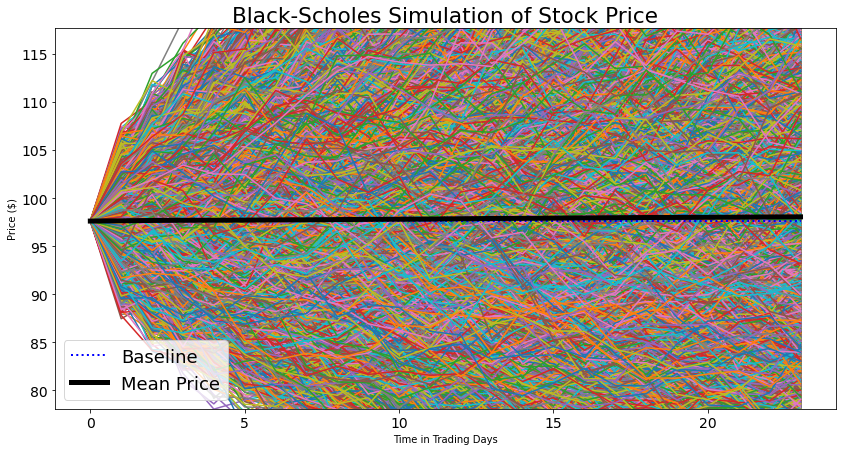

In [103]:
""" Plots """

fig, ax = plt.subplots(figsize = (14,7))

ax.plot(price_simulations)
ax.plot(Baseline.T, color = 'blue', linewidth=2, linestyle ='dotted', label = 'Baseline')
ax.plot(meanPrices.T, color = 'black', linewidth=5, label = 'Mean Price')
plt.rcParams.update({'font.size': 18})
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(14)
ax.set_ylim([np.multiply(starting_price,.8), np.multiply(meanPrices[0,-1],1.2)])
# amend the above line to set the y-axis limits yourself, or comment out to remove limits entirely
ax.set(title="Black-Scholes Simulation of Stock Price",
       xlabel='Time in Trading Days',
       ylabel='Price ($)')
ax.legend()
plt.show()

c:\Users\zhanming\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


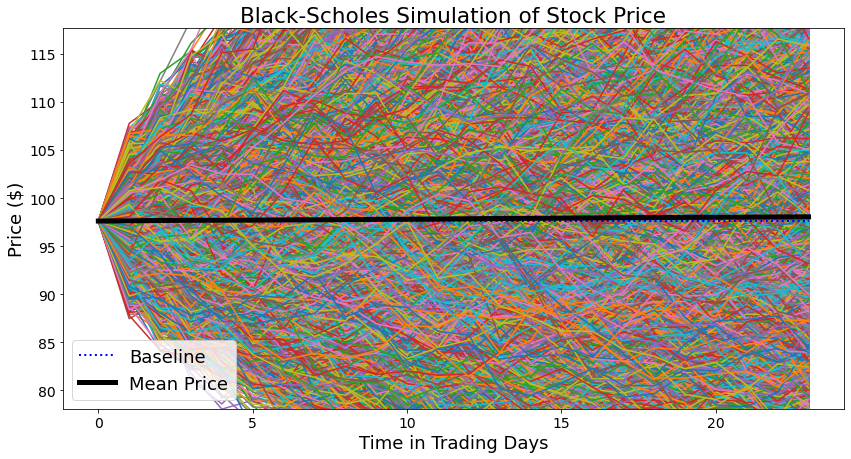

In [104]:
""" Plots """

fig, ax = plt.subplots(figsize = (14,7))

ax.plot(price_simulations)
ax.plot(Baseline.T, color = 'blue', linewidth=2, linestyle ='dotted', label = 'Baseline')
ax.plot(meanPrices.T, color = 'black', linewidth=5, label = 'Mean Price')
plt.rcParams.update({'font.size': 18})
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(14)
ax.set_ylim([np.multiply(starting_price,.8), np.multiply(meanPrices[0,-1],1.2)])
# amend the above line to set the y-axis limits yourself, or comment out to remove limits entirely
ax.set(title="Black-Scholes Simulation of Stock Price",
       xlabel='Time in Trading Days',
       ylabel='Price ($)')
ax.legend()
plt.show()